In [1]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

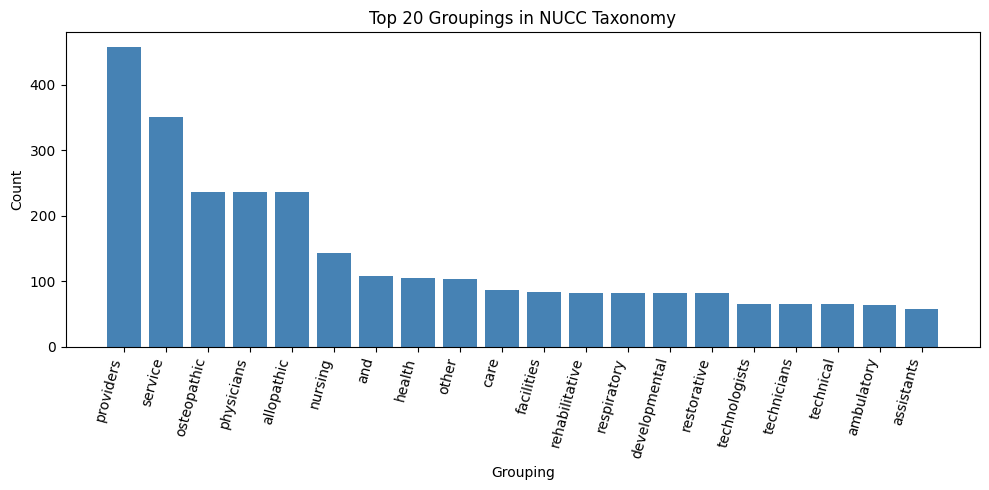

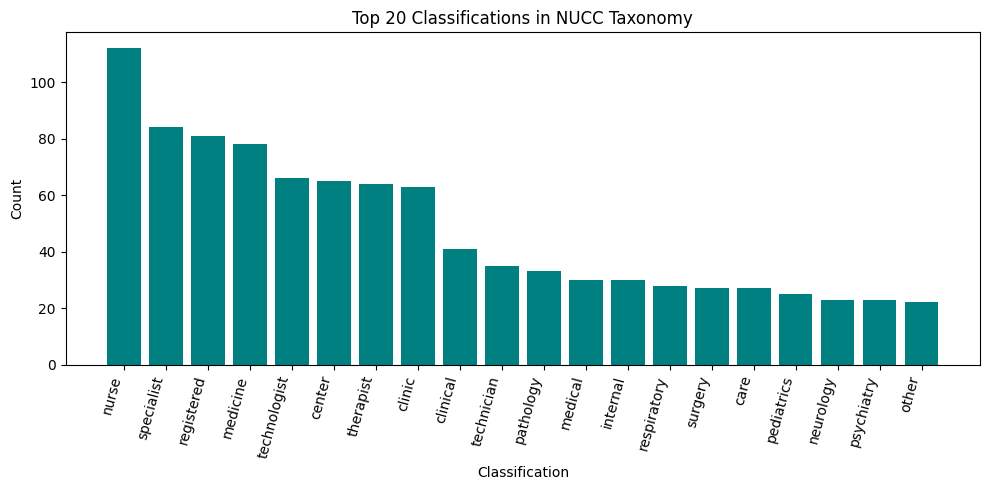

In [8]:
# =============================================================
# 📊 Basic EDA: Distribution of Groupings and Classifications (using scikit-learn)
# =============================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load your data
nucc = pd.read_csv("./dataset/nucc_taxonomy_master.csv")
nucc.columns = [c.strip().lower() for c in nucc.columns]

# =============================================================
# Use CountVectorizer to tokenize and count frequencies
# =============================================================

# Convert text columns into token count matrices
vectorizer_group = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
X_group = vectorizer_group.fit_transform(nucc["grouping"].astype(str))
group_vocab = vectorizer_group.get_feature_names_out()
group_freq = X_group.toarray().sum(axis=0)
group_df = pd.DataFrame({"grouping": group_vocab, "count": group_freq}).sort_values("count", ascending=False)

vectorizer_class = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
X_class = vectorizer_class.fit_transform(nucc["classification"].astype(str))
class_vocab = vectorizer_class.get_feature_names_out()
class_freq = X_class.toarray().sum(axis=0)
class_df = pd.DataFrame({"classification": class_vocab, "count": class_freq}).sort_values("count", ascending=False)

# =============================================================
# Plot Grouping Distribution
# =============================================================
plt.figure(figsize=(10,5))
plt.bar(group_df["grouping"].head(20), group_df["count"].head(20), color="steelblue")
plt.title("Top 20 Groupings in NUCC Taxonomy")
plt.xlabel("Grouping")
plt.ylabel("Count")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()

# =============================================================
# Plot Classification Distribution
# =============================================================
plt.figure(figsize=(10,5))
plt.bar(class_df["classification"].head(20), class_df["count"].head(20), color="teal")
plt.title("Top 20 Classifications in NUCC Taxonomy")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


In [7]:
# =============================================================
# 📘 Dataset Preview: NUCC Master and Input Specialties
# =============================================================

import pandas as pd

# Load datasets
nucc = pd.read_csv("dataset/nucc_taxonomy_master.csv")
inp  = pd.read_csv("dataset/input_specialties.csv")

# Display column names and sample rows for context
print("NUCC Taxonomy Dataset Columns:", list(nucc.columns))
print("Input Specialties Dataset Columns:", list(inp.columns))

# Display top 10 rows from each dataset
print("\n=== NUCC Taxonomy Master (Top 10 Rows) ===")
display(nucc.head(10))

print("\n=== Input Specialties (Top 10 Rows) ===")
display(inp.head(10))


NUCC Taxonomy Dataset Columns: ['Code', 'Grouping', 'Classification', 'Specialization', 'Definition', 'Notes', 'Display_Name', 'Section']
Input Specialties Dataset Columns: ['raw_specialty']

=== NUCC Taxonomy Master (Top 10 Rows) ===


,Code,Grouping,Classification,Specialization,Definition,Notes,Display_Name,Section
0,193200000X,Group,Multi-Specialty,NaN,A business group of one or more individual pra...,[7/1/2003: new],Multi-Specialty Group,Individual
1,193400000X,Group,Single Specialty,NaN,A business group of one or more individual pra...,[7/1/2003: new],Single Specialty Group,Individual
2,207K00000X,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,An allergist-immunologist is trained in evalua...,"Source: American Board of Medical Specialties,...",Allergy & Immunology Physician,Individual
3,207KA0200X,Allopathic & Osteopathic Physicians,Allergy & Immunology,Allergy,"A physician who specializes in the diagnosis, ...",Source: National Uniform Claim Committee,Allergy Physician,Individual
4,207KI0005X,Allopathic & Osteopathic Physicians,Allergy & Immunology,Clinical & Laboratory Immunology,An allergy and immunology physician who specia...,"Source: National Uniform Claim Committee, 2022...",Clinical & Laboratory Immunology (Allergy & Im...,Individual
5,207L00000X,Allopathic & Osteopathic Physicians,Anesthesiology,NaN,An anesthesiologist is trained to provide pain...,"Source: American Board of Medical Specialties,...",Anesthesiology Physician,Individual
6,207LA0401X,Allopathic & Osteopathic Physicians,Anesthesiology,Addiction Medicine,An anesthesiologist who specializes in the dia...,"Source: National Uniform Claim Committee, 2009...",Addiction Medicine (Anesthesiology) Physician,Individual
7,207LC0200X,Allopathic & Osteopathic Physicians,Anesthesiology,Critical Care Medicine,"An anesthesiologist, who specializes in critic...","Source: American Board of Medical Specialties,...",Critical Care Medicine (Anesthesiology) Physician,Individual
8,207LH0002X,Allopathic & Osteopathic Physicians,Anesthesiology,Hospice and Palliative Medicine,An anesthesiologist with special knowledge and...,Source: American Academy of Hospice and Pallia...,Hospice and Palliative Medicine (Anesthesiolog...,Individual
9,207LP2900X,Allopathic & Osteopathic Physicians,Anesthesiology,Pain Medicine,An anesthesiologist who provides a high level ...,"Source: American Board of Medical Specialties,...",Pain Medicine (Anesthesiology) Physician,Individual



=== Input Specialties (Top 10 Rows) ===


,raw_specialty
0,ACUPUNCTURE
1,ADOLESCENT MEDICINE
2,ALLERGY & IMMUNOLOGY
3,ANATOMIC & CLINICAL PATHOLOGY
4,ANESTHESIOLOGY
5,APPLIED BEHAVIORAL ANALYSIS (ABA)
6,AUDIOLOGY
7,BARIATRIC SURGERY
8,CARDIAC ELECTROPHYSIOLOGY
9,CARDIAC SURGERY


In [1]:
# =============================================================
# 🎲 Print Random 10 Rows from Synonyms Dictionary
# =============================================================

import pandas as pd

# Load synonyms CSV
syn = pd.read_csv("./synonyms.csv")

# Normalize column names
syn.columns = [c.strip().lower() for c in syn.columns]

# Print 10 random rows
print("=== 🎲 Random 10 Rows from synonyms.csv ===")
print(syn.sample(10, random_state=42))  # random_state ensures reproducibility


=== 🎲 Random 10 Rows from synonyms.csv ===
   synonym             standard
30     ent       otolaryngology
0       aa       anesthesiology
22    derm          dermatology
31      er   emergency medicine
18      ct  computed tomography
28   emerg   emergency medicine
10   cardi           cardiology
53      ms  medical social work
4       ag    adult gerontology
12      ci  clinical immunology
